In [8]:
# import modules needed for the code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [53]:
# extract the data required for analysis

start = dt.datetime(2015,1,1)
end = dt.date.today()

spy = get_pricing('SPY', start_date = start, end_date = end)
qqq = get_pricing('QQQ', start_date = start, end_date = end)

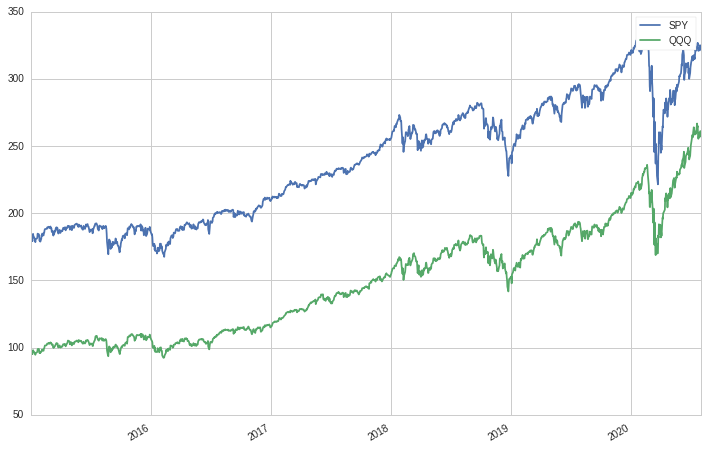

In [54]:
# data visualisation

spy['close_price'].plot(label="SPY", figsize=(12,8))
qqq['close_price'].plot(label="QQQ", figsize=(12,8))
plt.legend()

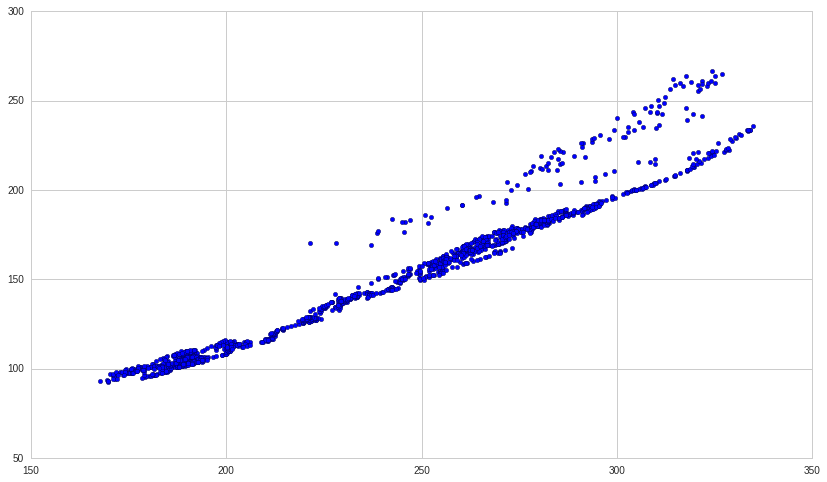

In [55]:
plt.scatter(spy['close_price'], qqq['close_price'])

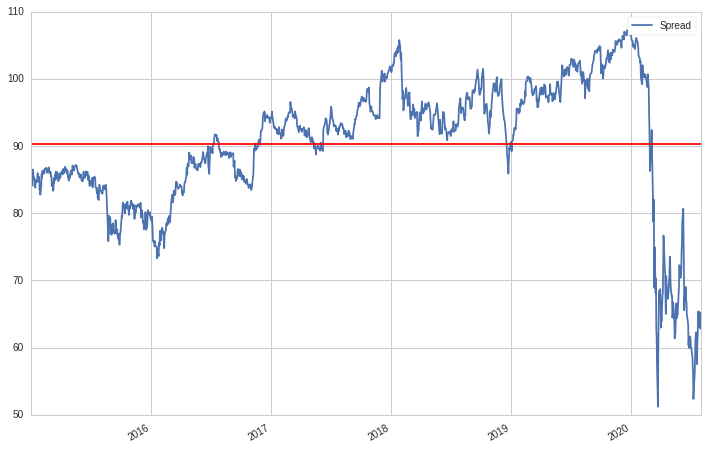

In [56]:
# calculate the spread

spread = spy['close_price'] - qqq['close_price']
spread.plot(label="Spread", figsize=(12,8))
plt.axhline(spread.mean(), c='r')
plt.legend()

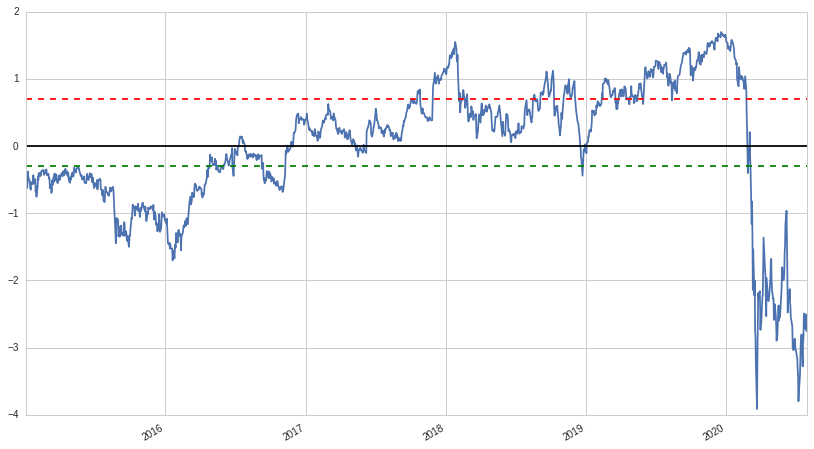

In [57]:
# calcute z-score

def zscore(stocks):
    return (stocks-stocks.mean())/(np.std(stocks))

zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), c='k')

plt.axhline(0.7, color = 'red', ls='--')
plt.axhline(-0.3, color = 'green', ls='--')

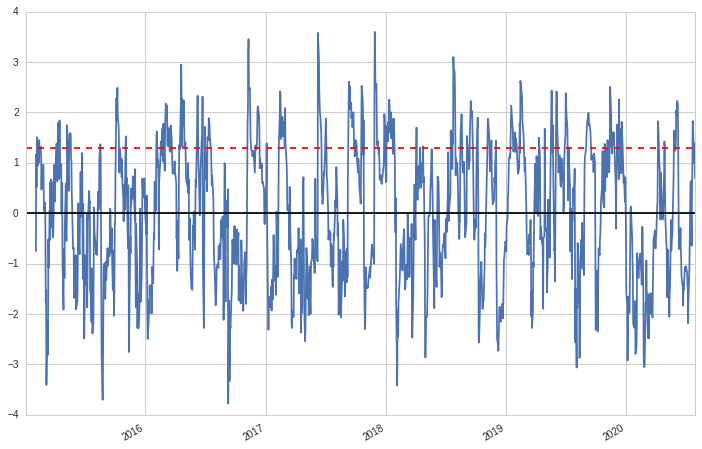

In [58]:
#calculate rolling z-score

spread_ma1 = spread.rolling(1).mean()
spread_ma21 = spread.rolling(21).mean()
std21 = spread.rolling(21).std()
zscore_21_1 = (spread_ma1-spread_ma21)/std21

zscore_21_1.plot(label = 'Rolling z-score 21 days', figsize=(12,8))
plt.axhline(0, color='k')
plt.axhline(1.3, color = 'r', ls='--')